In [1]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
import pandas as pd
import os
import json
import math

# Modulo3

## Aula 1

In [2]:
cwd = os.getcwd()
caminho = os.path.join(cwd, 'PeNSE_2015_AMOSTRA2.zip')

zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep=';', thousands='.', decimal=',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


In [3]:
dados.shape

(16556, 181)

In [4]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [6]:
#dados.select_dtypes(include='object')
dados.select_dtypes(include='float')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


### Desafio 01 - Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

In [7]:
# lista dos arquivos no diretório atual
#!ls

In [8]:
#extraindo aruivos
#!unzip {caminho}

In [9]:
# listando novamente diretório atual após a extração
#!ls

### Desafio 02 - Estudar sobre a base de dados que vamos trabalhar. (PeNSE - 2015 Amostra 2)

Nota metodológica: [Especificações de tabelas e indicadores
Amostra 2](https://ftp.ibge.gov.br/pense/2015/microdados/Notas_Metodologicas/Nota_metodologica_03_especificacao_tabelas_Amostra_2_20180514.pdf)

A construção das tabelas obedeceu o seguinte princípio:
- **Nas linhas são apresentados resultados para três grupos de idades:** 13 a 17
anos, 13 a 15 anos e 16 e 17 anos. Os níveis de desagregação geográfica
(Brasil e Grandes Regiões) estão dispostos abaixo dos grupos de idade
supracitados.


- **Nas colunas são apresentados os percentuais resultantes de filtros aplicados.**
Eventualmente, sexo e dependência administrativa da escola são utilizados
como filtro.

### Desafio 03 - Classificar algumas perguntas como QualitativaXQuantitativa

**Qualitativos:** denota caracteristicas que não são quantificaveis

Nominal: denota qualidade que não pode ser ordenada

Ordinal: denota qualidade que pode ser ordenada


**Quantitativos:** denota caracteristicas que são quantificaveis

contínuo: que possuí número números depois da virgula denotando uma continuidade

discreto: que não possuí número números depois da virgula é expressado apenas em um número inteiro

In [10]:
tipos_de_dados = pd.read_csv('tipos-perguntas.csv')
tipos_de_dados.head()

,VARIÁVEL,PERGUNTA,tipo de dado,subtipo
0,ANOPESQ,Ano em que a pesquisa foi realizada,qualitativo,ordinal
1,PAIS,País,qualitativo,nominal
2,REGEOGR,Região geográfica,qualitativo,nominal
3,VB00004,"Prezado(a) estudante, você concorda em partici...",qualitativo,nominal
4,VB01001,Qual é o seu sexo?,qualitativo,nominal


In [11]:
tipos_de_dados.loc[(tipos_de_dados['tipo de dado'] == 'quantitativo') &
                   (tipos_de_dados['subtipo'] == 'discreto')]

,VARIÁVEL,PERGUNTA,tipo de dado,subtipo
6,VB01003,Qual é a sua idade?,quantitativo,discreto
17,VB01010A,"Contando com você, quantas pessoas moram na su...",quantitativo,discreto
24,VB01019,Quantos banheiros com chuveiro têm dentro da s...,quantitativo,discreto


In [12]:
tipos_de_dados.loc[(tipos_de_dados['tipo de dado'] == 'quantitativo') &
                   (tipos_de_dados['subtipo'] == 'contínuo')]

,VARIÁVEL,PERGUNTA,tipo de dado,subtipo


In [13]:
tipos_de_dados.loc[(tipos_de_dados['tipo de dado'] == 'qualitativo') &
                   (tipos_de_dados['subtipo'] == 'nominal')]

,VARIÁVEL,PERGUNTA,tipo de dado,subtipo
1,PAIS,País,qualitativo,nominal
2,REGEOGR,Região geográfica,qualitativo,nominal
3,VB00004,"Prezado(a) estudante, você concorda em partici...",qualitativo,nominal
4,VB01001,Qual é o seu sexo?,qualitativo,nominal
5,VB01002,Qual é a sua cor ou raça?,qualitativo,nominal
10,VB01022,Em que turno você estuda?,qualitativo,nominal
11,VB01023,Você estuda em regime integral (tem atividades...,qualitativo,nominal
12,VB01024,Você estuda em regime de internato (a escola p...,qualitativo,nominal
14,VB01026,Quando terminar o ciclo/curso que você está fr...,qualitativo,nominal
15,VB01006,Você mora com sua mãe?,qualitativo,nominal


In [14]:
tipos_de_dados.loc[(tipos_de_dados['tipo de dado'] == 'qualitativo') &
                   (tipos_de_dados['subtipo'] == 'ordinal')]

,VARIÁVEL,PERGUNTA,tipo de dado,subtipo
0,ANOPESQ,Ano em que a pesquisa foi realizada,qualitativo,ordinal
7,VB01004,Qual é o mês do seu aniversário?,qualitativo,ordinal
8,VB01005,Em que ano você nasceu?,qualitativo,ordinal
9,VB01021,Em que ano/série você está?,qualitativo,ordinal
13,VB01025,Qual o grau de escolaridade mais elevado que v...,qualitativo,ordinal


## Aula 2

In [15]:
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [16]:
dados['VB01001'].value_counts(normalize=True)*100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [17]:
frequencia = dados['VB11007'].value_counts()
frequencia

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [18]:
percentual = dados['VB11007'].value_counts(normalize=True)*100
percentual

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [19]:
respostas = {1: 'muito Satisfeito',
             2: 'Satisfeito',
             3: 'Indiferente',
             4: 'Insatisfeito',
             5: 'Muito Insatisfeito',
             99: 'Não Informado'}
dist_freq = pd.DataFrame({'Frequencia': frequencia, 'Percentual': percentual})
dist_freq.rename(index = respostas, inplace=True)
dist_freq.rename_axis('Sentimento em relação ao seu corpo', axis=1, inplace=True)
dist_freq

Sentimento em relação ao seu corpo,Frequencia,Percentual
Satisfeito,6920,41.797536
muito Satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito Insatisfeito,714,4.312636
Não Informado,181,1.093259


### desafio 04: criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações.

In [20]:
def criar_frequencia(df, name_index, dict_index=''):
    freq = df.value_counts()
    percent = df.value_counts(normalize=True)*100

    tab_frequencia = pd.DataFrame({'Frequencia': freq, 'Percentual': percent})

    if dict_index != '':
        tab_frequencia.rename(index=dict_index, inplace=True)

    tab_frequencia.rename_axis(name_index, axis=1, inplace=True)

    return tab_frequencia

In [21]:
nome_index = 'Sentimento em relação ao seu corpo'
desafio_04 = criar_frequencia(dados['VB11007'], nome_index, respostas)
desafio_04

Sentimento em relação ao seu corpo,Frequencia,Percentual
Satisfeito,6920,41.797536
muito Satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito Insatisfeito,714,4.312636
Não Informado,181,1.093259


## Aula 3

In [22]:
dados['IMC'] = dados['VB17003'] / ((dados['VB17004']/100)**2)
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [23]:
classes = [0, 18.5, 25, 30, 60]
labels = ['abaixo', 'normal', 'sobrepeso', 'obesidade']

dados['CLASSE_IMC'] = pd.cut(x=dados['IMC'],
                             bins=classes,
                             labels=labels,
                             include_lowest=True)

dados[['CLASSE_IMC', 'IMC']]

,CLASSE_IMC,IMC
0,abaixo,15.051321
1,normal,21.727839
2,normal,18.502907
3,normal,23.322831
4,sobrepeso,28.122076
...,...,...
16551,normal,20.113223
16552,abaixo,17.930782
16553,normal,23.968489
16554,normal,18.995343


In [24]:
nome_index = 'Classes IMC'
frequencia_imc = criar_frequencia(dados['CLASSE_IMC'],nome_index)
frequencia_imc

Classes IMC,Frequencia,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


**Regra de Sturges e CrossTabs:**

![img](https://maestrovirtuale.com/wp-content/uploads/2019/10/Regla-de-Sturges-10.png)

o k é igaul a 
1 + 

(10/3)=3,322  *  

np.log10=(log10)  

N=(tamanho_amostra)


número de classes que se obtem é proporcionaol ao tamanho da amostra. Com essa fórmula é possível descobrir o número ideal de 'k' classes para altura.

[fonte de referência](https://maestrovirtuale.com/regra-de-sturges-explicacao-aplicacoes-e-exemplos/#:~:text=Ao%20adicionar%20a%20frequ%C3%AAncia%20absoluta,amostra%3B%20neste%20caso%2C%2030.&text=Dessa%20maneira%2C%20a%20regra%20Sturges,cria%C3%A7%C3%A3o%20de%20tabelas%20e%20gr%C3%A1ficos.)

In [25]:
dados['VB17004'].min()

124.1

In [26]:
dados['VB17004'].max()

195.3

In [27]:
import numpy as np
tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
k

15

In [28]:
dados['CLASSE_ALTURA'] = pd.cut(x=dados['VB17004'],
                                bins=k,
                                include_lowest=True)

dados[['CLASSE_ALTURA', 'VB17004']]

,CLASSE_ALTURA,VB17004
0,"(152.58, 157.327]",157.0
1,"(147.833, 152.58]",152.0
2,"(157.327, 162.073]",161.4
3,"(171.567, 176.313]",172.5
4,"(166.82, 171.567]",167.5
...,...,...
16551,"(166.82, 171.567]",167.9
16552,"(181.06, 185.807]",185.8
16553,"(157.327, 162.073]",159.4
16554,"(157.327, 162.073]",157.8


In [29]:
nome_index = 'Classes Altura'
frequencia_altura = criar_frequencia(dados['CLASSE_ALTURA'],nome_index)
frequencia_altura

Classes Altura,Frequencia,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [30]:
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'],normalize=True)*100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1:'Masculino', 2:'Femiino'},inplace = True)
frequencia_cruzada

VB01001,Masculino,Femiino
VB11007,,
muito Satisfeito,16.199565,11.633245
Satisfeito,21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito,4.747524,9.301764
Muito Insatisfeito,1.570428,2.742208
Não Informado,0.718773,0.374487


In [31]:
#percentual em relação as colunas
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'],normalize='columns')*100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1:'Masculino', 2:'Femiino'},inplace = True)
frequencia_cruzada

VB01001,Masculino,Femiino
VB11007,,
muito Satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito Insatisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


In [32]:
#percentual em relação ao index
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'],normalize='index')*100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1:'Masculino', 2:'Femiino'},inplace = True)
frequencia_cruzada

VB01001,Masculino,Femiino
VB11007,,
muito Satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito Insatisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


### Desafio: Criar uma tabela de frequência para o peso usando a Regra de Sturges

In [33]:
dados['CLASSE_PESO_ALUNO'] = pd.cut(x=dados['VB17003'],
                                    bins=k,
                                    include_lowest=True)

dados[['CLASSE_PESO_ALUNO', 'VB17003']]

,CLASSE_PESO_ALUNO,VB17003
0,"(34.94, 46.32]",37.1
1,"(46.32, 57.7]",50.2
2,"(46.32, 57.7]",48.2
3,"(69.08, 80.46]",69.4
4,"(69.08, 80.46]",78.9
...,...,...
16551,"(46.32, 57.7]",56.7
16552,"(57.7, 69.08]",61.9
16553,"(57.7, 69.08]",60.9
16554,"(46.32, 57.7]",47.3


In [34]:
nome_index = 'Classes Peso'
frequencia_peso_aluno = criar_frequencia(dados['CLASSE_PESO_ALUNO'],nome_index)
frequencia_peso_aluno

Classes Peso,Frequencia,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


### Desafio: Criar outros crosstab() para analisar”
Além de criar mais crosstab() para fazer a análise, pesquisar na documentação do crosstab um parâmetro chamado aggfunc. Ver o que esse parâmetro faz e tenta rodar uns experimentos com ele."pesquisar sobre o parâmetro aggfunc e testar”.

In [35]:
#percentual em relação ao index
desafio_05 = pd.crosstab(dados['VB11007'], dados['CLASSE_IMC'],normalize='index')*100
desafio_05.rename(index = respostas, inplace = True)
desafio_05

CLASSE_IMC,abaixo,normal,sobrepeso,obesidade
VB11007,,,,
muito Satisfeito,38.693576,53.407118,6.445312,1.453993
Satisfeito,29.638728,60.014451,8.208092,2.138728
Indiferente,25.456558,52.296624,15.052573,7.194245
Insatisfeito,19.432502,52.493551,19.604471,8.469475
Muito Insatisfeito,23.809524,42.577031,21.428571,12.184874
Não Informado,32.596685,57.458564,7.734807,2.209945


In [36]:
# média de peso vs satisfação e sexo
frequencia_cruzada_media_peso = pd.crosstab(index=dados['VB11007'],
                                            columns=dados['VB01001'],
                                            values=dados['VB17003'],
                                            aggfunc='mean')
frequencia_cruzada_media_peso.rename(index=respostas, inplace=True)
frequencia_cruzada_media_peso.rename(columns={1: 'Masculino', 2: 'Femiino'}, 
                                     inplace=True)
frequencia_cruzada_media_peso

VB01001,Masculino,Femiino
VB11007,,
muito Satisfeito,51.863236,48.219834
Satisfeito,57.187479,51.375714
Indiferente,61.129368,55.273629
Insatisfeito,65.075573,57.812727
Muito Insatisfeito,60.234231,59.389648
Não Informado,54.711765,51.227419


## Aula 4

<AxesSubplot:title={'center':'Distribuição de frequência'}, xlabel='Altura', ylabel='Count'>

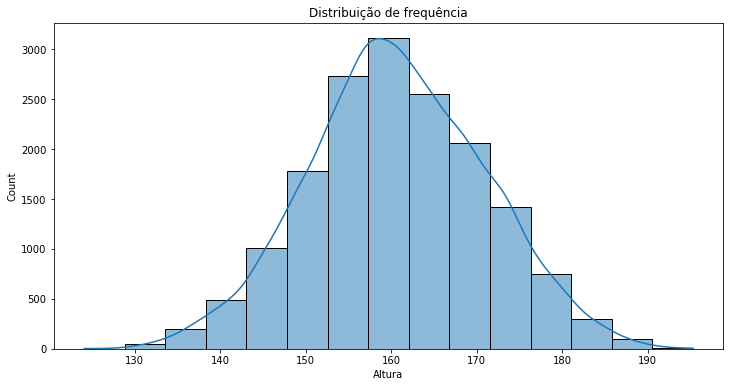

In [37]:
import seaborn as sns

ax = sns.histplot(data=dados, x='VB17004', bins=k, kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')

ax

<AxesSubplot:title={'center':'Distribuição de frequência'}, xlabel='Altura', ylabel='Count'>

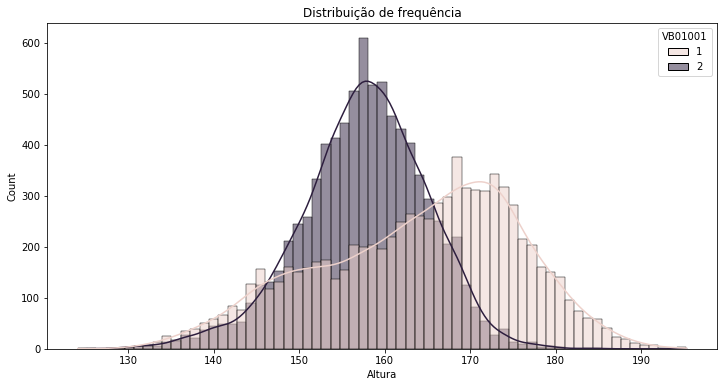

In [38]:
#altura pelo sexo 1=masculino e 2=feminino
ax = sns.histplot(data=dados, x='VB17004', kde=True, hue='VB01001')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')

ax

Exemplo de péssima visualização de histograma com muitas classes:

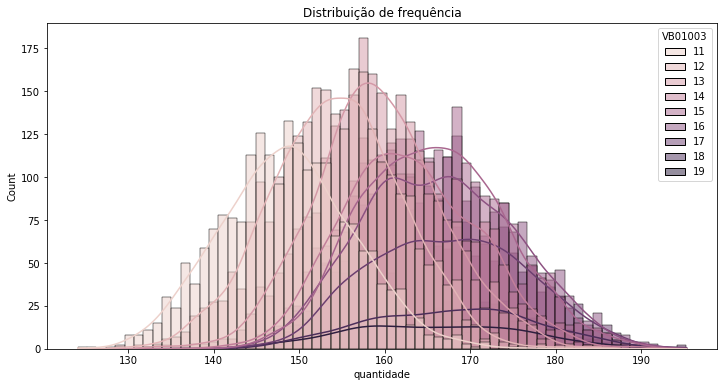

In [39]:
ax = sns.histplot(data=dados, x='VB17004', kde=True, hue='VB01003')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('quantidade')

ax; #o ';' remove o texto da execução antes do gráfico

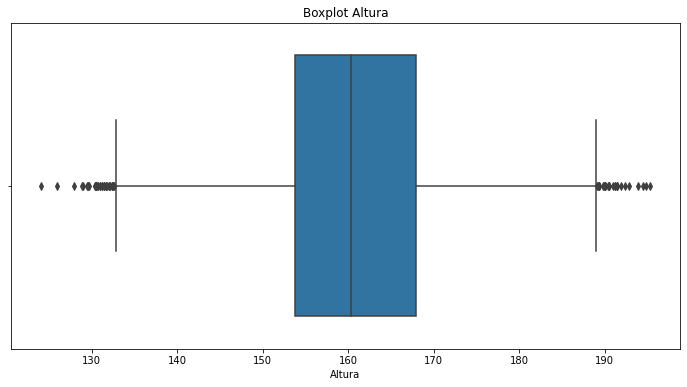

In [40]:
ax = sns.boxplot(data=dados, x='VB17004',
                 #hue='VB01003'
                )
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot Altura')
ax.set_xlabel('Altura')

ax;

In [41]:
dados['VB17004'].quantile(0.75)

167.9

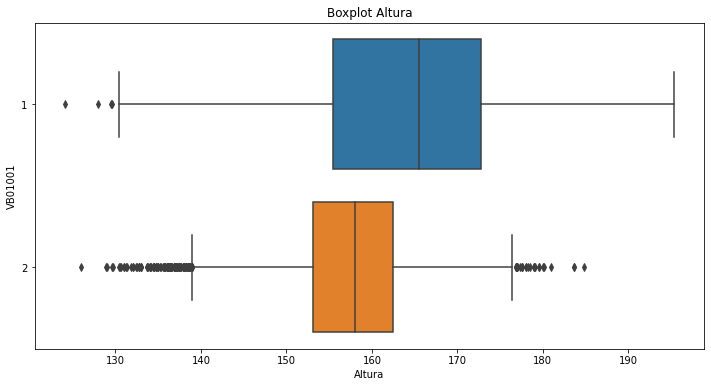

In [42]:
ax = sns.boxplot(data=dados, x='VB17004',y='VB01001', orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot Altura')
ax.set_xlabel('Altura')

ax;

Exemplo de boa visualização para muitas clases

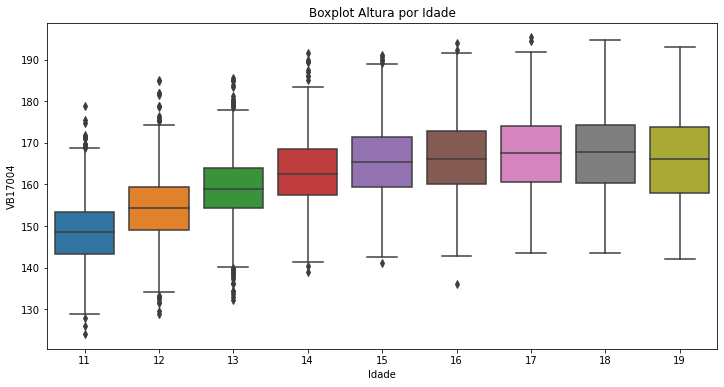

In [43]:
ax = sns.boxplot(data=dados, x='VB01003', y='VB17004')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot Altura por Idade')
ax.set_xlabel('Idade')

ax;

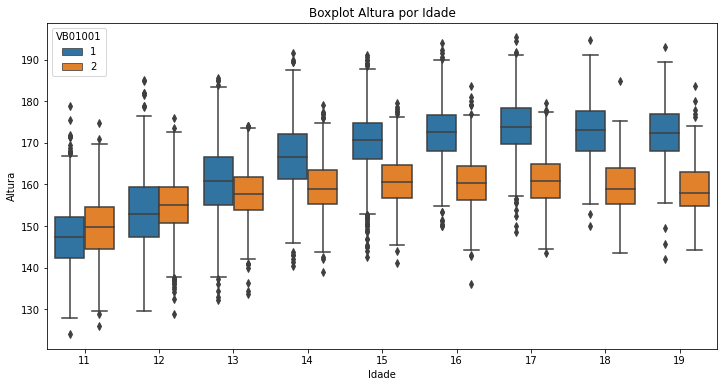

In [44]:
ax = sns.boxplot(data=dados, x='VB01003', y='VB17004', hue='VB01001')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot Altura por Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura')
ax;

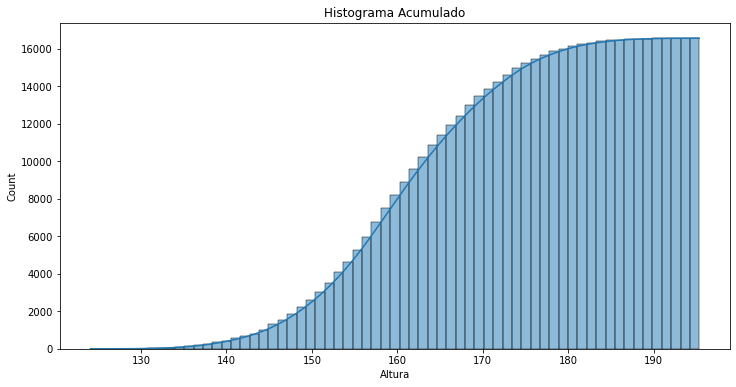

In [45]:
ax = sns.histplot(x = "VB17004", data = dados, 
                  kde = True, 
                  cumulative = True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Histograma Acumulado")
ax.set_xlabel("Altura")
ax;

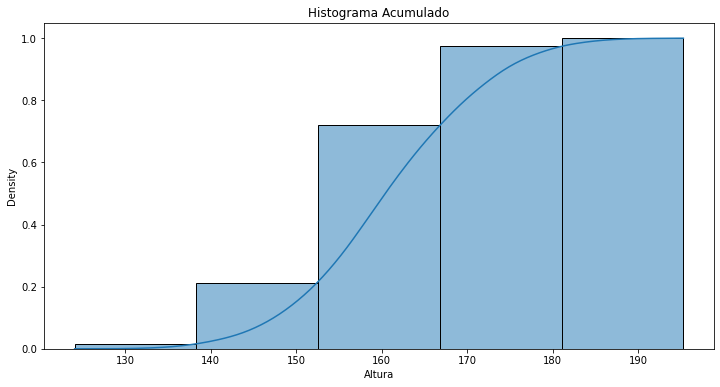

In [46]:
ax = sns.histplot(x = "VB17004", data = dados, 
                  kde = True, 
                  cumulative = True,
                  stat = 'density', bins = 5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Histograma Acumulado")
ax.set_xlabel("Altura")
ax;

### Desafio: Calcular o desvio padrão, média, moda e mediana e plotar no gráfico

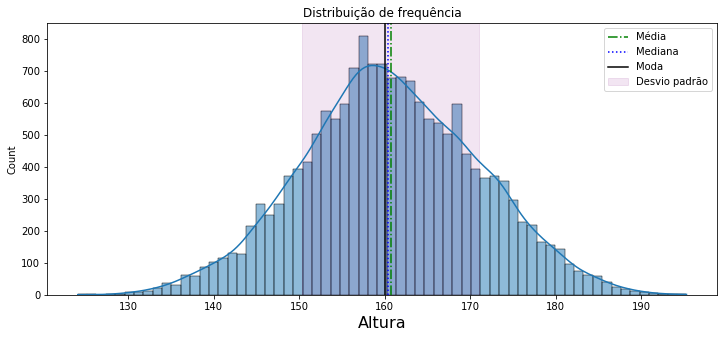

In [47]:
media = dados['VB17004'].mean()
mediana = dados['VB17004'].median()
moda = dados['VB17004'].mode()[0]
desvio = dados['VB17004'].std()
desvio_inferior = media - desvio
desvio_superior = media + desvio

ax = sns.histplot(data=dados, x='VB17004', kde=True)
ax.figure.set_size_inches(12,5)
ax.set_title("Distribuição de frequência")
ax.set_xlabel('Altura', fontsize=16)

ax.axvline(media, color="green", linestyle="-.", label="Média")
ax.axvline(mediana, color="blue", linestyle=":", label="Mediana")
ax.axvline(moda, color="black", linestyle="-", label="Moda")
ax.axvspan(desvio_inferior, desvio_superior, alpha=0.1, color="purple", label="Desvio padrão")
ax.legend()
ax;

### Desafio: Fazer a análise com o histograma para outras informações da base de dados

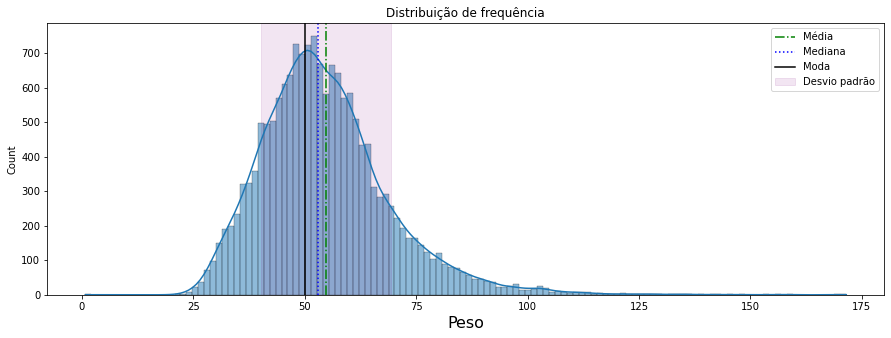

In [48]:
media = dados['VB17003'].mean()
mediana = dados['VB17003'].median()
moda = dados['VB17003'].mode()[0]
desvio = dados['VB17003'].std()
desvio_inferior = media - desvio
desvio_superior = media + desvio

ax = sns.histplot(data=dados, x='VB17003', kde=True)
ax.figure.set_size_inches(15,5)
ax.set_title("Distribuição de frequência")
ax.set_xlabel('Peso', fontsize=16)

ax.axvline(media, color="green", linestyle="-.", label="Média")
ax.axvline(mediana, color="blue", linestyle=":", label="Mediana")
ax.axvline(moda, color="black", linestyle="-", label="Moda")
ax.axvspan(desvio_inferior, desvio_superior, alpha=0.1, color="purple", label="Desvio padrão")
ax.legend()
ax;

### Desafio: Pesquisar como é determinado  os outliers no boxplot do seaborn

![img](https://raw.githubusercontent.com/fervassoler/bootcamp-data-science-aplicada/main/bootcamp/modulo3/desafio-09-solicitacao.png)

Infelizmente diferente do que foi citado na aula, não existe nenhuma referência sobre a forma que é feito o cálculo dos outliers na documentação do [seaborn boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html)


Pesquisei em outros lugares como referência, e acredito que a forma como o seaborn implementa esse cálculo se baseia na seguinte fórmula:

IQR 1.5:<br>
IQR = (Q3 - Q1)<br>
Limite inferior: (Q1 - (1.5 * IQR))<br>
Limite superior: (Q3 + (1.5 * IQR))

Referências:<br>
[Finding Outliers & Modified Boxplots 1.5(IQR) Rule](https://www.youtube.com/watch?v=Cm_852R8JPw)<br>
[matplotlib](https://matplotlib.org/api/cbook_api.html#matplotlib.cbook.boxplot_stats)

**Exemplo abaixo:**

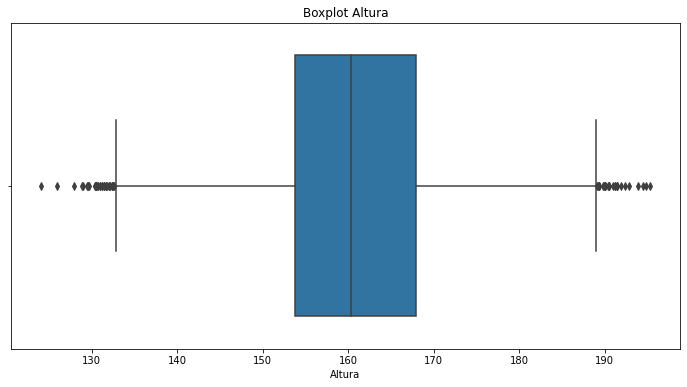

In [49]:
ax = sns.boxplot(data=dados, x='VB17004',
                 #hue='VB01003'
                )
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot Altura')
ax.set_xlabel('Altura')

ax;

In [50]:
Q1 = dados['VB17004'].quantile(0.25)
Q3 = dados['VB17004'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')
print('')

Limite_inferior = (Q1 - (1.5 * IQR))
Limite_superior = (Q3 + (1.5 * IQR))

print(f'Limite inferior = {Limite_inferior}')
print(f'Limite superior = {Limite_superior}')

Q1 = 153.8
Q3 = 167.9

Limite inferior = 132.65000000000003
Limite superior = 189.05


## Aula 5

In [51]:
dados['VB17004'].mean()

160.71311307078818

In [52]:
dados.groupby("VB01001")["VB17004"].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [53]:
dados["VB17004"].mode()

0    160.0
dtype: float64

In [54]:
dados.groupby(["VB01001", "VB01003"])["VB17004"].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

### Desafio: Fazer a descrição de outras variáveis, analisar e compartilhar suas analises no discord

In [55]:
# VB04001	Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas? 
# -1	Pulo no questionário
# 1	Sim
# 2	Não
# 99	Não informado

# VB01003 - idades

dados.groupby('VB01003')['VB04001'].value_counts(normalize=True)*100

VB01003  VB04001
11       -1         100.000000
12       -1         100.000000
13        2          87.309645
          1          12.338930
          99          0.351425
14        2          79.184248
          1          20.768870
          99          0.046882
15        2          77.979381
          1          21.979381
          99          0.041237
16        2          72.378855
          1          27.533040
          99          0.088106
17        2          66.428107
          1          33.376708
          99          0.195185
18        2          61.634103
          1          38.365897
19        2          56.232687
          1          43.490305
          99          0.277008
Name: VB04001, dtype: float64

In [56]:
# VB04002	Que idade você tinha quando experimentou fumar cigarro pela primeira vez?
# -1	Pulo no questionário
# 7	7 anos de idade ou menos
# 8	8 anos
# 9	9 anos
# 10	10 anos
# 11	11 anos
# 12	12 anos
# 13	13 anos
# 14	14 anos
# 15	15 anos
# 16	16 anos
# 17	17 anos 
# 18	18 anos ou mais
# 99	Não informado

#VB04002 - sexo 1=masculino e 2=feminino

dados_informados = dados.loc[(dados['VB04002'] != -1) & (dados['VB04002'] != 99)]
dados_informados.groupby('VB01001')['VB04002'].value_counts(normalize=True)*100

VB01001  VB04002
1        14         16.877919
         15         16.210807
         13         15.076718
         12         13.342228
         16          8.539026
         10          6.470981
         11          6.270847
         7           5.470314
         17          4.136091
         9           3.068712
         8           2.468312
         18          2.068045
2        13         19.347319
         15         17.637918
         14         17.327117
         12         13.442113
         16          7.303807
         10          5.594406
         11          4.972805
         17          4.040404
         7           3.962704
         9           2.719503
         8           1.942502
         18          1.709402
Name: VB04002, dtype: float64

In [57]:
dados.groupby('VB04001')['VB01003'].mean()

VB04001
-1     11.559711
 1     15.660721
 2     14.931008
 99    14.588235
Name: VB01003, dtype: float64

### Desafio: Fazer o cálculo da média por sexo e idade através do crosstab

In [58]:
#exemplo com groupby
dados.groupby(["VB01001", "VB01003"])["VB17004"].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [59]:
media_por_sexo = pd.crosstab(dados['VB01001'],dados['VB01003'], 
                             values=dados['VB17004'], aggfunc='mean').T

media_por_sexo

VB01001,1,2
VB01003,,
11,147.617753,149.522512
12,153.696764,154.965021
13,160.719801,157.673105
14,166.406922,159.340320
15,170.336297,160.759848
16,172.424933,160.386527
17,173.814341,160.907937
18,173.024561,159.438462
19,172.143158,158.977193


### Super Desafio 01: Criar um dicionário com os dados do dicionário pense para facilirtar a busca da pergunta

In [60]:
path_dicionario_pense = zip.namelist()[-1]

dados_dicionario = pd.read_excel(zip.open(path_dicionario_pense))
dados_dicionario.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [61]:
print(dados_dicionario.iloc[0,0])
print(dados_dicionario.iloc[0,1])

ANOPESQ
Ano em que a pesquisa foi realizada


In [62]:
dicionario_pense = {}
item = {}
respostas = {'respostas': [{}]}
tipo_anterior, tipo_atual = '', ''
pergunta = ''
tem_resposta = False

for i in range(0, dados_dicionario.shape[0]):
    
    nome_variavel = dados_dicionario.iloc[i, 0]
    descricao_variavel = dados_dicionario.iloc[i, 1]
    
    if i == 0:
        tipo_anterior, tipo_atual = 'pergunta', 'pergunta'
        pergunta = nome_variavel
    else:
        tipo_anterior = tipo_atual

    if type(nome_variavel) is int:
        if i > 0:
            tipo_atual = 'resposta'

        respostas['respostas'][0].update(
            {nome_variavel: descricao_variavel})
        tem_resposta = True
    else:
        try:
            int(nome_variavel[0])
            if i > 0:
                tipo_atual = 'resposta'

            respostas['respostas'][0].update(
                {nome_variavel: descricao_variavel})
            tem_resposta = True
            
        except:
            if i > 0:
                tipo_atual = 'pergunta'

            if tem_resposta:
                dicionario_pense[pergunta].update(respostas)
                tem_resposta = False
                respostas = {'respostas': [{}]}

            pergunta = nome_variavel
            item = {nome_variavel: {"descricao": descricao_variavel}}
            dicionario_pense.update(item)

In [63]:
json_object = json.dumps(dicionario_pense, indent=4, ensure_ascii=False)
print(json_object)

{
    "ANOPESQ": {
        "descricao": "Ano em que a pesquisa foi realizada"
    },
    "PAIS": {
        "descricao": "País",
        "respostas": [
            {
                "76": "Brasil"
            }
        ]
    },
    "REGEOGR": {
        "descricao": "Região geográfica",
        "respostas": [
            {
                "1": "Norte",
                "2": "Nordeste",
                "3": "Sudeste",
                "4": "Sul",
                "5": "Centro-Oeste"
            }
        ]
    },
    "VB00004": {
        "descricao": "Prezado(a) estudante, você concorda em participar dessa pesquisa?",
        "respostas": [
            {
                "1": "Sim"
            }
        ]
    },
    "VB01001": {
        "descricao": "Qual é o seu sexo?",
        "respostas": [
            {
                "1": "Masculino",
                "2": "Feminino"
            }
        ]
    },
    "VB01002": {
        "descricao": "Qual é a sua cor ou raça?",
        "respostas": [
 

### Super Desafio 02: De alguma maneira sumarizar as perguntas para ficar mais curta sem perder o contexto. ferramentas sugeridas: NLTK, GESIM, 

**EXEMPLO DE SUMARIZAÇÃO**

In [64]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

**Primero passo vai ser remover frases longas que estão entre parenteses das perguntas**

Para isso vou usar regex para encontrar n caracteres entre parenteses e remover tudo inclusive os parenteses da frase.

In [65]:
texto = "Você estuda em regime integral (tem atividades escolares por 7 horas ou mais horas diárias, durante todo o período escolar)?"
regex = '([(](.*)[)])'
texto = re.sub(regex, '', texto)
texto

'Você estuda em regime integral ?'

**Segundo passo vai ser remover palavras não relevantes (stopwords) ex:** <br>
("e, de, ou, para, a , o...")

Para isso vou utilizar a biblioteca nltk

In [66]:
# tokenização do texto
texto_token = word_tokenize(texto)
print(texto_token)

['Você', 'estuda', 'em', 'regime', 'integral', '?']


In [67]:
# definindo stopwords em português
stops = stopwords.words('portuguese')
stops[:5]

['de', 'a', 'o', 'que', 'e']

In [68]:
# removendo stopwords de texto_token
texto_final = list(filter(
    lambda texto_token: texto_token not in stops, texto_token))
print(texto_final)

['Você', 'estuda', 'regime', 'integral', '?']


**Aplicando a sumerização no dicionário**

In [69]:
stops = stopwords.words('portuguese')
regex = '([(](.*)[)])'
keys = list(dicionario_pense.keys())

for key in keys:

    # definindo o texto a ser sumarizado
    texto = dicionario_pense[key]['descricao']

    # removendo frases entre parenteses
    texto = re.sub(regex, '', texto)

    # tokenizando o texto
    texto_token = word_tokenize(texto)

    # removendo stop words do texto
    texto_final = list(filter(
        lambda texto_token: texto_token not in stops, texto_token))

    frase = ''
    # transformando token em texto
    for i in range(0, len(texto_final)):
        
        if i < (len(texto_final)-1):
            frase = frase + texto_final[i] + ' '
        else:
            frase = frase + texto_final[i]
    
    chars = [',', '.', ':', '?']
    for c in chars:
        frase = frase.replace(f" {c}", f"{c}")
        
    #salvando sumarização no dicionário
    dicionario_pense[key]['descricao'] = frase

for key in keys:
    print(dicionario_pense[key]['descricao'])

Ano pesquisa realizada
País
Região geográfica
Prezado estudante, concorda participar dessa pesquisa?
Qual sexo?
Qual cor raça?
Qual idade?
Qual mês aniversário?
Em ano nasceu?
Em ano/série?
Em turno estuda?
Você estuda regime integral?
Você estuda regime internato?
Qual grau escolaridade elevado pretendo concluir?
Quando terminar ciclo/curso frequentando atualmente, pretende?
Você mora mãe?
Você mora pai?
Contando, quantas pessoas moram casa apartamento?
Na casa telefone fixo?
Você celular?
Na casa computador?
Você acesso internet casa?
Alguém mora casa carro?
Alguém mora casa moto?
Quantos banheiros chuveiro têm dentro casa?
Tem empregado recebendo dinheiro fazer trabalho casa, três dias semana?
Qual nível ensino mãe estudou estuda?
Você algum trabalho, emprego negócio atualmente?
Você recebe dinheiro trabalho, emprego negócio?
Você costuma tomar café manhã?
Você costuma almoçar jantar mãe, pai responsável?
Você costuma comer assistindo TV estudando?
Sua escola oferece comida
Você cos

In [70]:
json_object = json.dumps(dicionario_pense, indent=4, ensure_ascii=False)
print(json_object)

{
    "ANOPESQ": {
        "descricao": "Ano pesquisa realizada"
    },
    "PAIS": {
        "descricao": "País",
        "respostas": [
            {
                "76": "Brasil"
            }
        ]
    },
    "REGEOGR": {
        "descricao": "Região geográfica",
        "respostas": [
            {
                "1": "Norte",
                "2": "Nordeste",
                "3": "Sudeste",
                "4": "Sul",
                "5": "Centro-Oeste"
            }
        ]
    },
    "VB00004": {
        "descricao": "Prezado estudante, concorda participar dessa pesquisa?",
        "respostas": [
            {
                "1": "Sim"
            }
        ]
    },
    "VB01001": {
        "descricao": "Qual sexo?",
        "respostas": [
            {
                "1": "Masculino",
                "2": "Feminino"
            }
        ]
    },
    "VB01002": {
        "descricao": "Qual cor raça?",
        "respostas": [
            {
                "1": "Branca",

### Estudar medidas de dispersão e calcular utilizando pandas, realizar os calculos para as outras colunas numéricas

Fonte: https://www.todamateria.com.br/medidas-de-dispersao/

**Amplitude**

Essa medida de dispersão é definida como a diferença entre a maior e a menor observação de um conjunto de dados, isto é:

A = Xmaior - Xmenor

Por ser uma medida que não leva em consideração como os dados estão efetivamente distribuídos, não é muito utilizada.

In [71]:
print(dicionario_pense['VB17003'])
print('')
print(f'peso mínimo: {dados["VB17003"].min()}')
print(f'peso máximo: {dados["VB17003"].max()}')
print()
print(f"Amplitude: {dados['VB17003'].max() - dados['VB17003'].min()}")

{'descricao': 'Peso estudante, incluindo imputados, casa decimal'}

peso mínimo: 0.8
peso máximo: 171.5

Amplitude: 170.7


**Variância**

A variância é determinada pela média dos quadrados das diferenças entre cada uma das observações e a média aritmética da amostra. O cálculo é feito com base na seguinte fórmula <br>
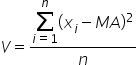

Sendo,

V: variância <br>
xi: valor observado <br>
MA: média aritmética da amostra <br>
n: número de dados observados <br>

**Exemplo:**<br>
Dados: 1 ano, 2 anos, 2 anos, 12 anos, 12 anos e 13 anos <br>
Encontrar a média primeiro: <br>
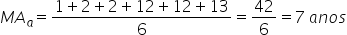
<br>
Calcular a variâcia conforme o resultado da média:<br>
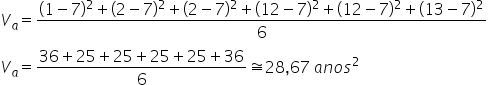

In [72]:
media_peso = dados["VB17003"].mean()
variancia = ((dados["VB17003"]-media_peso)**2).sum() / dados.shape[0]

print(f'média de peso: {round(media_peso, 2)}')
print(f'variância de peso: {round(variancia, 2)}')

média de peso: 54.71
variância de peso: 211.63


**Desvio Padrão**

O desvio padrão é definido como a raiz quadrada da variância. Desta forma, a unidade de medida do desvio padrão será a mesma da unidade de medida dos dados, o que não acontece com a variância.

Assim, o desvio padrão é encontrado fazendo-se:

img

Quando todos os valores de uma amostra são iguais, o desvio padrão é igual a 0. Sendo que, quanto mais próximo de 0, menor é a dispersão dos dados.

In [73]:
desvio_padrao = math.sqrt(variancia)
print(round(desvio_padrao, 2))

14.55


**Coeficiente de Variação**

Para encontrar o coeficiente de variação, devemos multiplicar o desvio padrão por 100 e dividir o resultado pela média. Essa medida é expressa em porcentagem.

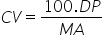

O coeficiente de variação é utilizado quando precisamos comparar variáveis que apresentam médias diferentes.

Como o desvio padrão representa o quanto os dados estão dispersos em relação a uma média, ao comparar amostras com médias diferentes, a sua utilização pode gerar erros de interpretação.

Desta forma, ao confrontar dois conjuntos de dados, o mais homogêneo será aquele que apresentar menor coeficiente de variação.

In [74]:
coeficiente_variacao = (desvio_padrao*100) / media_peso
print(round(coeficiente_variacao,2))

26.59


## Aula 6

In [75]:
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums

o que é o intervalo de confiança, nesse cenário:<br>
existe uma chance da média das alturas dos jovens esteja representada nesse intervalo

In [76]:
#intervalo de confiança
zconfint(dados['VB17004'].to_list())

(160.5556082427712, 160.87061789880892)

In [77]:
descricao_altura = DescrStatsW(dados['VB17004'])
descricao_altura.tconfint_mean()

(160.55559672649298, 160.8706294150872)

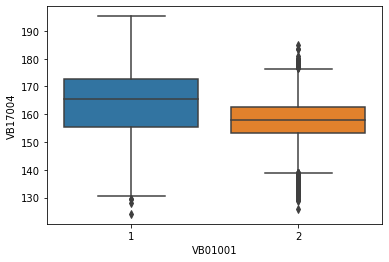

In [78]:
sns.boxplot(x = 'VB01001', y = 'VB17004', data = dados); 

In [79]:
distribuicao_altura_m = dados.query('VB01001 == 1')['VB17004']
distribuicao_altura_f = dados.query('VB01001 == 2')['VB17004']

# ztest considera no calculo uma distribuição normal e n amostra maior que 30
# ztest: se x1 e x2 forem estatisticamente iguais o pvalue é >= 0.05, senão hipotese nula é recusada
p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)[1]
p_value

0.0

In [80]:
p_value = ztest(distribuicao_altura_m, distribuicao_altura_m)[1]
p_value

1.0

o teste de normalidade serve para analisar se a curva da distribuição é normal<br>
<br>
hipose nula = curva normal<br>
hipotese alternativa = curna não é normal
<br>

In [81]:
p_value_normaltest = normaltest(distribuicao_altura_m)[1]
p_value_normaltest

7.695118853996524e-75

In [82]:
if p_value_normaltest < 0.05:
    print('hipotese nula recusada, curva não é normal')
else:
    print('hipotese nula aceita, curva é normal')

hipotese nula recusada, curva não é normal


In [83]:
normaltest(distribuicao_altura_f)

NormaltestResult(statistic=212.51572610499005, pvalue=7.125189471020874e-47)

In [84]:
normaltest(distribuicao_altura_m)

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

In [85]:
ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

### Desafio: O que é intervalo de confiança, nível de confiança e o que é significancia.

**Intervalo de confiança:** <br>
É uma estimativa de um intervalo utilizado na estatística, que contém um parâmetro populacional. Esse parâmetro de população desconhecido é encontrado através de um modelo de amostra calculado a partir dos dados recolhidos.

Exemplo: a média de uma amostra recolhida x̅ pode ou não coincidir com a verdadeira média populacional μ. Para isso, é possível considerar um intervalo de médias amostrais onde esta média populacional possa estar contida. Quanto maior este intervalo, maior a probabilidade de isso ocorrer.
<br>
<br>
**Nível de confiança:**<br>
O intervalo de confiança é expresso em porcentagem, denominadas por nível de confiança, sendo 90%, 95% e 99% as mais indicadas. <br>
Na imagem abaixo, por exemplo, temos um intervalo de confiança de 90% entre seus limites superior e inferior (a e -a).
<br>
<br>
![img](https://www.significados.com.br/foto/intervaloconfiancaok.jpg)
<br>
Fonte: https://www.significados.com.br/intervalo-de-confianca/

**Significância:**<br>
Ao realizarmos um estudo científico que envolva análise de de amostras para inferência estatística,  devemos antes de tudo definir o limite do valor de “p”. É por meio dessa definição que iremos determinar a significância de nossa inferência.


De modo geral,  determina-se o valor de p como menor que 5%, ou seja, “p<0,05” (sendo 0,05 o valor de 5% em valor decimal, lembre-se que 0,05 x 100 = 5%) . Nada impede que o pesquisador determine menor nível de significância, ma em geral utiliza-se esse limite para as ciência sociais, já para ciências biológicas, médicas ou exatas pode-se utilizar menor significância.

Assim,  Se em nosso estudo obtermos uma significância menor do que 0,05 (“p>0,005”) , então estamos  assumindo que há uma probabilidade de apenas 5% de que a diferença encontrada no estudo não seja verdadeira, apesar de, estatisticamente, ter sido assim demonstrada. Por exemplo, se estivermos comparando duas formas de tratamento clinico e se obtivermos um valor de 0,02, ou seja, 2% para nossa comparação, então teremos  esse valor de probabilidade de não ser verdade que há diferença entre os tratamentos, ou seja, teremos 98% de chances de haver diferenças entre eles.

Logo, podemos concluir que para menores valores “p”, então teremos menor chance de erros, e portanto maior será a significância, ou seja, menor será a probabilidade de erros. De uma forma geral, os resultados de um estudo podem variar de “não significante” até “extremamente significante”, como mostra a tabela a seguir. Significância Estatística, conforme o valor de P
<br>
<br>

| Valor de P   | Significado               |
|--------------|---------------------------|
| 0,05         | Não significante          |
| 0,01 a 0,05  | Significante              |
| 0,001 a 0,01 | Muito significante        |
| <0,001       | Extremamente significante |

### Desafio: Plotar o intervalo de confiança no histograma das alturas.

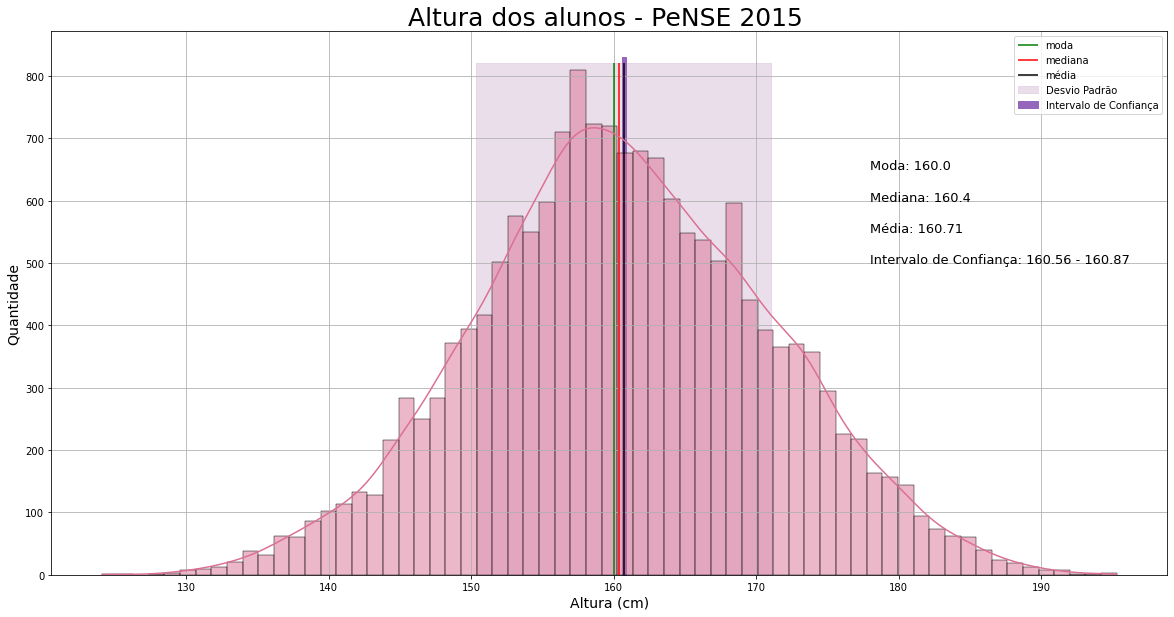

In [86]:
# VB17004	Altura do estudante
ax = sns.histplot(data = dados, x = 'VB17004',  kde = True, color= 'palevioletred')
ax.figure.set_size_inches(20,10)
ax.set_title('Altura dos alunos - PeNSE 2015 ', fontsize=25)

# Formatando duas casas decimais
pd.options.display.float_format = "{:,.2f}".format

# Calculo da média, moda e mediana
media_altura  = dados['VB17004'].mean()
moda_altura   = dados['VB17004'].mode()[0]
mediana_altura = dados['VB17004'].median()

# Marcando com linhas verticais no gráfico
ax.vlines(moda_altura, ymin=0, ymax = 820, color='green', label='moda')
ax.vlines(mediana_altura, ymin=0, ymax = 820, color='red', label='mediana')
ax.vlines(media_altura, ymin=0, ymax = 820, color='black', label='média')

# Intervalo de confiânça 
conf_int_ini = zconfint(dados["VB17004"])[0] 
conf_int_fim = zconfint(dados["VB17004"])[1] 

# Anotações dos valores
plt.annotate(f'Moda: {round(moda_altura,2)}', xy=(178,650), fontsize=13)
plt.annotate(f'Mediana: {round(mediana_altura,2)}', xy=(178,600), fontsize=13)
plt.annotate(f'Média: {round(media_altura,2)}', xy=(178,550), fontsize=13)
plt.annotate(f'Intervalo de Confiança: {round(conf_int_ini,2)} - {round(conf_int_fim,2)}', xy=(178,500), fontsize=13)

# Nomeando os eixos
ax.set_xlabel('Altura (cm)', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)

# Busca os limites da faixa de desvio padrão pela média
lower_limit = dados['VB17004'].mean() - dados['VB17004'].std()
upper_limit = dados['VB17004'].mean() + dados['VB17004'].std()

ax.fill_betweenx(y=[0,820], 
                 x1=lower_limit,
                 x2=upper_limit,
                 color='thistle', label='Desvio Padrão', alpha=0.5)


# Marcando com linhas intervalos de confiança
ax.fill_betweenx(y=[0,830], 
                 x1=conf_int_ini,
                 x2=conf_int_fim,
                 color='tab:purple', label='Intervalo de Confiança')
#ax.figure.set_facecolor('lavender')
ax.grid()

plt.legend()
plt.show()

### Desafio: Realizar os testes de hipóteses de outras colunas e explorar a base de dados

**Pergunta para levantar uma hipótese:**<br>
Como é a distribuição do imc para as pessoas que estão satisfeitas com o seu próprio corpo, ela é estatisticamente diferente das pessoas que estão insatisfeitas com o corpo?

Nesse caso vou propor:<br>
**hipótese nula:** a distribuição do imc é estatisticamente igual, para pessoas satisfeitas e insatisfeitas com o corpo.<br>
**hipótese alternativa:** a distribuição do imc é estatisticamente diferente, para pessoas satisfeitas e insatisfeitas com o corpo.

In [87]:
dicionario_pense['VB11007']

{'descricao': 'Como sente relação corpo?',
 'respostas': [{'1': 'Muito satisfeito(a)',
   '2': 'Satisfeito(a)',
   '3': 'Indiferente',
   '4': 'Insatisfeito(a)',
   '5': 'Muito insatisfeito(a)',
   99: 'Não informado'}]}

Para classificar apenas em satisfeito e insatisfeito vou considerar os dados da seguinte forma:<br>
**satisfeito:**<br>
'1': 'Muito satisfeito(a)'<br>
'2': 'Satisfeito(a)',<br>
<br>
**insatisfeito:**<br>
'4': 'Insatisfeito(a)',<br>
'5': 'Muito insatisfeito(a)'<br>
<br>
**foram removidos da análise os dados:**<br>
'3': 'Indiferente'<br>
99: 'Não informado'<br>

In [88]:
satisfeito_com_corpo = dados.query('VB11007 == 1 or VB11007 == 2')
insatisfeito_com_corpo = dados.query('VB11007 == 4 or VB11007 == 5')

**Analisando os dados de IMC de cada grupo visualmente**

<AxesSubplot:ylabel='Frequency'>

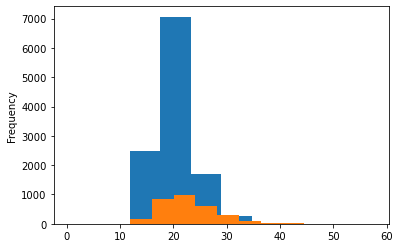

In [89]:
#o insatisfeito é a cor laranja
satisfeito_com_corpo['IMC'].plot.hist()
insatisfeito_com_corpo['IMC'].plot.hist()

**Verificar se é uma distribuição normal**

In [90]:
dados_satisfacao = [satisfeito_com_corpo, insatisfeito_com_corpo]

for df_satisfacao in dados_satisfacao:
    p_value_normaltest = normaltest(df_satisfacao['IMC'])[1]
    
    if p_value_normaltest < 0.05:
        print('hipotese nula recusada, curva não é normal')
    else:
        print('hipotese nula aceita, curva é normal')

hipotese nula recusada, curva não é normal
hipotese nula recusada, curva não é normal


**Verificar se é os dados são estatisticamente semelhantes**

In [91]:
p_value_ranksums = ranksums(satisfeito_com_corpo['IMC'], insatisfeito_com_corpo['IMC'])[1]

if p_value_ranksums < 0.05:
    print('hipotese nula recusada, as distribuições são estatisticamente diferentes')
else:
    print('hipotese nula aceita, as distribuições são estatisticamente diferentes')

hipotese nula recusada, as distribuições são estatisticamente diferentes


**Conclusão:** <br> 
**hipótese alternativa**<br>
A distribuição do imc é estatisticamente diferente, para pessoas satisfeitas e insatisfeitas com o corpo.